In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import nanonispy as nap

In [3]:
import scipy.stats as stats

In [3]:
grid=nap.read.Grid(".\STM-1 Run #84 NbSe2 film\Grid Spectroscopy005.3ds")

In [101]:
grid.signals['Bias (V)'][0][0]

array([ 1.5000000e-03,  1.3500000e-03,  1.2000001e-03,  1.0500000e-03,
        8.9999998e-04,  7.5000001e-04,  6.0000003e-04,  4.4999999e-04,
        3.0000001e-04,  1.5000001e-04,  1.0842022e-19, -1.5000001e-04,
       -3.0000001e-04, -4.4999999e-04, -6.0000003e-04, -7.5000001e-04,
       -8.9999998e-04, -1.0500000e-03, -1.2000001e-03, -1.3500000e-03,
       -1.5000000e-03], dtype=float32)

In [103]:
grid.signals['sweep_signal']

array([ 0.0015 ,  0.00135,  0.0012 ,  0.00105,  0.0009 ,  0.00075,
        0.0006 ,  0.00045,  0.0003 ,  0.00015,  0.     , -0.00015,
       -0.0003 , -0.00045, -0.0006 , -0.00075, -0.0009 , -0.00105,
       -0.0012 , -0.00135, -0.0015 ], dtype=float32)

In [75]:
for key in grid.signals:
    print(key)

params
Current (A)
Lockin X (V)
Lockin Y (V)
Bias (V)
sweep_signal
topo


In [4]:
bias_vals=grid.signals.get("sweep_signal")
bias = bias_vals *1000

In [5]:
lockin=grid.signals.get("Lockin X (V)")
lockin.shape

(55, 40, 21)

In [6]:
topography = grid.signals.get('topo')
topo_reshaped = topography.reshape((40,55))

In [94]:
plt.figure()
plt.plot(bias,np.mean(lockin,axis=(0,1)))
plt.ylim((0,4))
plt.xlabel("Bias (mV)",size=20)
plt.ylabel("dI/dV (a.u.)",size=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)   
plt.title('Average spectrum at 1.5 T (Area 1)',size=20)
plt.tight_layout()

plt.savefig(".\STM-1 Run #84 NbSe2 film\Grid 05 average.png", dpi=300)
plt.close()

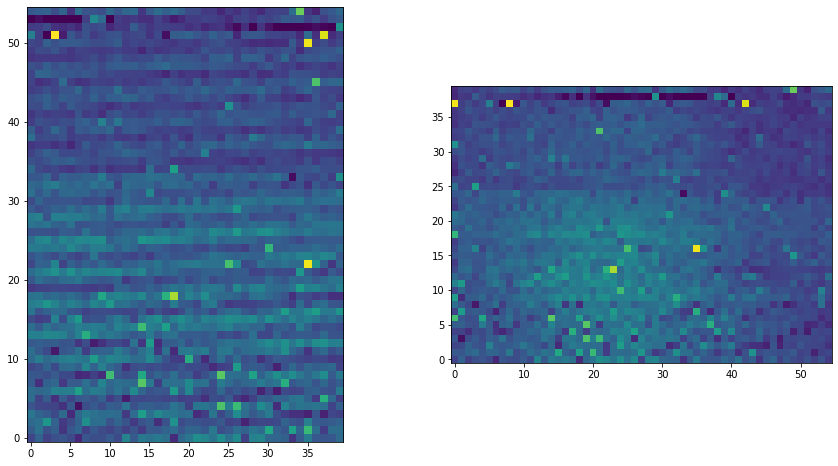

In [18]:
plt.rcParams["figure.figsize"] =[15,8]

plt.figure()
a = lockin[:,:,10]
a_reshaped = a.reshape((40,55))

plt.subplot(121)
plt.imshow(a,cmap='viridis',aspect=1,origin='lower')
plt.subplot(122)
plt.imshow(a_reshaped,cmap='viridis',aspect=1,origin='lower')
#sns.heatmap(a.transpose(),cmap='Blues_r',square=True,vmin=0,vmax=3.5)

plt.show()

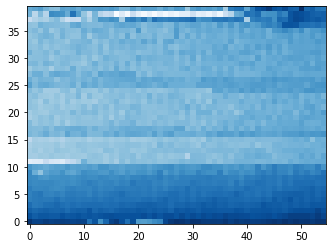

In [177]:
plt.figure()
plt.imshow(topo_reshaped,cmap='Blues_r',aspect=1,origin='lower')

# Average spectrums of several maps in one figure

In [4]:
grid_list = []
for i in range(28,32):
    grid_temp = nap.read.Grid('.\STM-1 Run #84 NbSe2 film\Grid Spectroscopy0'+str(i)+'.3ds')
    grid_list.append(grid_temp)
    
grid_temp = nap.read.Grid('.\STM-1 Run #84 NbSe2 film\Grid Spectroscopy035.3ds')
grid_list.append(grid_temp)
grid_temp = nap.read.Grid('.\STM-1 Run #84 NbSe2 film\Grid Spectroscopy037.3ds')
grid_list.append(grid_temp)
grid_temp = nap.read.Grid('.\STM-1 Run #84 NbSe2 film\Grid Spectroscopy039.3ds')
grid_list.append(grid_temp)

In [5]:
bias_vals=grid_list[0].signals.get("sweep_signal")
bias = bias_vals *1000

In [6]:
lockin_avg_list = []
for i in range(7):
    lockin=grid_list[i].signals.get("Lockin X (V)")
    lockin_avg_list.append(np.mean(lockin,axis=(0,1)))

### Lower part dIdV map at 4T

In [7]:
grid_4T=nap.read.Grid(".\STM-1 Run #84 NbSe2 film\Grid Spectroscopy039.3ds")
lockin=grid_4T.signals.get("Lockin X (V)")
lockin_4T_reshaped = lockin.reshape(30,55,51)
lockin_4T_lower = lockin_4T_reshaped[:13,:,:]
lockin_4T_loweravg = np.mean(lockin_4T_lower,axis=(0,1))

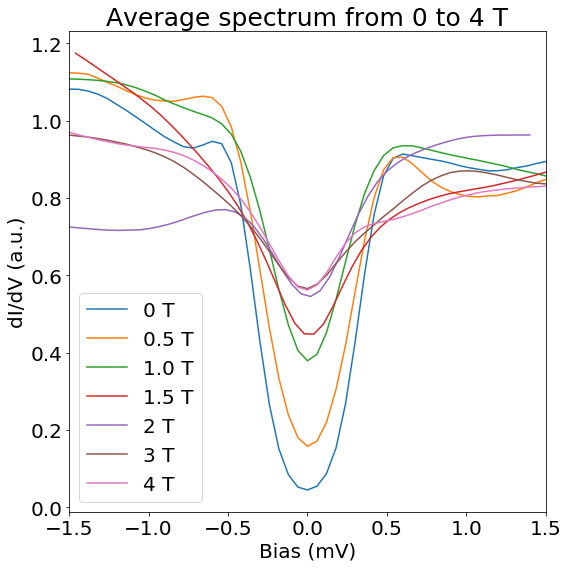

In [8]:
plt.figure(figsize=(8,8))
plt.plot(bias,lockin_avg_list[0],label = '0 T')
plt.plot(bias,lockin_avg_list[1],label = '0.5 T')
plt.plot(bias,lockin_avg_list[2]/2,label = '1.0 T')
plt.plot(bias+0.04,lockin_avg_list[3]/2,label = '1.5 T')
plt.plot(bias-0.1,lockin_avg_list[4]/2.0,label = '2 T')
plt.plot(bias,lockin_avg_list[5]/2.0,label = '3 T')
plt.plot(bias,lockin_avg_list[6]/2.15,label = '4 T')
plt.legend(fontsize=20)
#plt.ylim((0,1.5))
plt.xlim((-1.5,1.5))
plt.xlabel("Bias (mV)",size=20)
plt.ylabel("dI/dV (a.u.)",size=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)   
plt.title('Average spectrum from 0 to 4 T',size=25)
plt.tight_layout();
#plt.savefig(".\STM-1 Run #84 NbSe2 film\Grid 28 to 31 and 35 37 38 average spectrum.png", dpi=300)
#plt.close()

# Lower part average spectrum

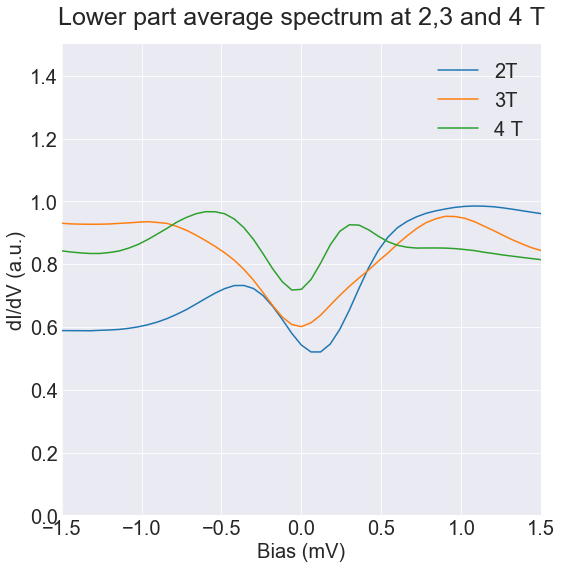

In [30]:
lockin_loweravg_2T = []
for i in range(51):
    lockin=grid_list[4].signals.get("Lockin X (V)")[:,:,i]
    lockin_reshape = lockin.reshape((30,55))
    lockin_lower = lockin_reshape[:13,:]
    lockin_loweravg_2T.append(np.mean(lockin_lower))
spec_loweravg_2T = np.array(lockin_loweravg_2T)

lockin_loweravg_3T = []
for i in range(51):
    lockin=grid_list[5].signals.get("Lockin X (V)")[:,:,i]
    lockin_reshape = lockin.reshape((30,55))
    lockin_lower = lockin_reshape[:13,:]
    lockin_loweravg_3T.append(np.mean(lockin_lower))

spec_loweravg_3T = np.array(lockin_loweravg_3T)
plt.figure(figsize=(8,8))
plt.plot(bias,spec_loweravg_2T/2.0,label='2T')
plt.plot(bias,spec_loweravg_3T/2.0,label='3T')
plt.plot(bias,lockin_4T_loweravg/2.15,label = '4 T')
plt.legend(fontsize=20)
plt.xlim((-1.5,1.5))
plt.ylim((0,1.5))
plt.xlabel("Bias (mV)",size=20)
plt.ylabel("dI/dV (a.u.)",size=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)   
plt.title('Lower part average spectrum at 2,3 and 4 T',size=25,pad =20)
plt.tight_layout();

# Topography and ZBC of a map in one figure

In [18]:
topo_list = []
for i in range(6):
    topography = grid_list[i].signals.get('topo')
    topo_reshaped = topography.reshape((30,55))
    topo_list.append(topo_reshaped)

In [39]:
ZBC_list = []
for i in range(6):
    ZBC_temp = grid_list[i].signals.get('Lockin X (V)')[:,:,25]
    ZBC_reshaped = ZBC_temp.reshape((30,55))
    ZBC_list.append(ZBC_reshaped)

In [25]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(10,12))

g1 = ax1.imshow(topo_list[5],cmap='Blues_r',aspect=1,origin='lower')
ax1.set_title('Topography',size=25)
fig.colorbar(g1, ax=ax1)

g2 = ax2.imshow(ZBC_list[5],cmap='Blues_r',aspect=1,origin='lower',vmin=0,vmax=2.5)
ax2.set_title('Zero Bias Conductance',size=25)
fig.colorbar(g2, ax=ax2)

plt.savefig(".\STM-1 Run #84 NbSe2 film\Grid37.png", dpi=300)
plt.close()

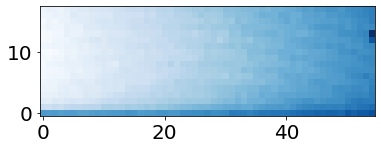

In [31]:
topo= grid_list[4].signals.get('topo')
topo_lower = topo.reshape((30,55))
plt.figure()
plt.imshow(topo_lower[:18,:],cmap='Blues_r',aspect=1,origin='lower')

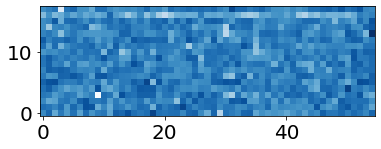

In [38]:
ZBC= grid_list[4].signals.get('Lockin X (V)')[:,:,25]
ZBC_reshaped = ZBC.reshape((30,55))

plt.figure()
plt.imshow(ZBC_reshaped[:18,:],cmap='Blues_r',aspect=1,origin='lower')

# Linecut from dIdV map

In [158]:
lockin=grid_list[1].signals.get("Lockin X (V)")
lockin_reshaped = lockin.reshape(30,55,51)
linecut = lockin_reshaped[:,44,:]
plt.figure(figsize=(4,8))
for i in range(30):
    plt.plot(bias,linecut[i,:]+0.3*i)
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Vertical linecut at 0.5 T',size=20,pad =20)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Vertical linecut in Grid 29.png", dpi=300)
plt.close()

In [160]:
lockin=grid_list[2].signals.get("Lockin X (V)")
lockin_reshaped = lockin.reshape(30,55,51)
linecut = lockin_reshaped[1,:,:]
plt.figure(figsize=(4,12))
for i in range(55):
    plt.plot(bias,linecut[i,:]+0.3*i)
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Second-line linecut at 1 T',size=20,pad =20)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Second_line linecut in Grid 30.png", dpi=300)
plt.close()

In [163]:
lockin=grid_list[3].signals.get("Lockin X (V)")
lockin_reshaped = lockin.reshape(30,55,51)
linecut = lockin_reshaped[9,:,:]
plt.figure(figsize=(4,12))
for i in range(55):
    plt.plot(bias,linecut[i,:]+0.3*i)
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Line10 linecut at 1.5 T',size=20,pad =20)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Line10 linecut in Grid 31.png", dpi=300)
plt.close()

# Variance of spectra in the lower map

In [180]:
lockin=grid_list[6].signals.get("Lockin X (V)")
lockin_reshaped = lockin.reshape(30,55,51)
lower_lockin = lockin_reshaped[:14,:,:]
plt.figure()
for i in range(14):
    for j in range(55):
        plt.plot(bias,lower_lockin[i,j],lw=0.5)
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Variance of spectra at 4 T',size=20)
plt.tight_layout()
plt.savefig(".\STM-1 Run #84 NbSe2 film\Variance of Spectra Grid 39.png", dpi=300)
plt.close()

# Histogram of ZBC and Coherence peak conductance in the lower map

In [12]:
lockin_list = []
for i in range(7):
    lockin_temp = grid_list[i].signals.get('Lockin X (V)')
    lockin_reshaped = lockin_temp.reshape(30,55,51)
    lower_lockin = lockin_reshaped[:14,:,:]
    lockin_list.append(lower_lockin)

In [13]:
ZBC_flat_list = []
for i in range(7):
    if i == 4:
        ZBC_flat = lockin_list[i][:,:,23].flatten()
        ZBC_flat_list.append(ZBC_flat)
    else:
        ZBC_flat = lockin_list[i][:,:,25].flatten()
        ZBC_flat_list.append(ZBC_flat)

In [9]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

In [77]:
#plt.hist(test_0T,bins = 800)
sns.distplot(ZBC_cut_list[0],bins = 30,kde=True,fit=stats.norm)
#plt.xlim(0,0.2)
plt.xlabel('Zero Bias Conductance',size = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Histogram of Zero Bias Conductance at 0 T',size =20);
plt.savefig('.\STM-1 Run #84 NbSe2 film\Hist of ZBC at 0 T.png',dpi=500)
plt.close()

In [240]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.figure(figsize=(16,16))
binslist = [30, 20, 30, 20, 22, 20, 22]
for i in range(1,8): 
    plt.subplot(4,2,i)
    sns.distplot(ZBC_cut_norm_list[(i-1)],bins = binslist[(i-1)],kde=True,fit=stats.norm)
    plt.xlabel('Zero Bias Conductance',size = 20)
    plt.xlim(left =0)
    if i < 5:
        plt.title('Histogram of Zero Bias Conductance at ' + str((i-1)*0.5) +' T',size =20)
    else:
        plt.title('Histogram of Zero Bias Conductance at ' + str(i-3) +' T',size =20)
    plt.tight_layout()
plt.savefig('.\STM-1 Run #84 NbSe2 film\Hist of ZBC at different magnetic field_fitted with Gaussian.png',dpi=500)
plt.close()

In [68]:
ZBC_cut_list = ZBC_flat_list.copy()

In [69]:
ZBC_cut_norm_list=[]

In [70]:
for i in range(7):
    for cyc in range(10):
        Mean = ZBC_cut_list[i].mean()
        STD = ZBC_cut_list[i].std()
        
        ZBC_cut_list[i] = ZBC_cut_list[i][(ZBC_cut_list[i] > (Mean -5*STD)) & \
                                          (ZBC_cut_list[i] < (Mean +5*STD))]

In [73]:
ZBC_cut_norm_list[6].shape

(761,)

In [74]:
ZBC_cut_list[6].shape

(761,)

In [72]:
for i in range(7):     
    if i<2:
        ZBC_cut_norm_list.append(ZBC_cut_list[i])
    elif i<6 and i>1:
        ZBC_cut_norm_list.append(ZBC_cut_list[i]/2.0)
    else:
        ZBC_cut_norm_list.append(ZBC_cut_list[i]/2.15)

In [176]:
import csv

with open("ZBC_original.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(ZBC_flat_list)

In [75]:
ZBC_cut_list[0].shape

(762,)

In [183]:
with open("ZBC_cut.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(ZBC_cut_list)

In [189]:
with open("ZBC_cut_norm.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(ZBC_cut_norm_list)

# Subtract background for spectrum (test) 

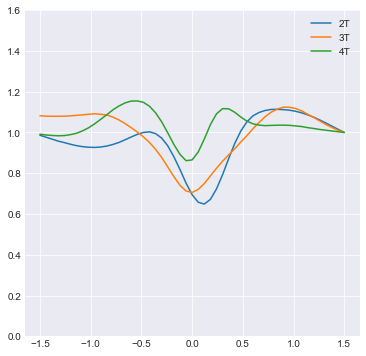

In [35]:
Test_list = [spec_loweravg_2T, spec_loweravg_3T, lockin_4T_loweravg]
plt.figure(figsize=(6,6))
for i in range(3):
    right = Test_list[i][:15].mean()
    left = Test_list[i][36:51].mean()
    slope = (right - left)/3.0
    Sub_spec =  Test_list[i]-bias*slope
    Norm_spec = Sub_spec/Sub_spec[0]
    plt.plot(bias, Norm_spec, label = str(2+i)+'T')
plt.ylim(0,1.6)
plt.legend();

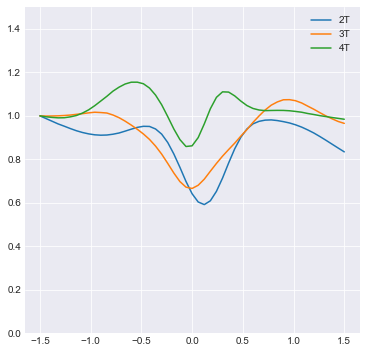

In [67]:
Test_list = [spec_loweravg_2T, spec_loweravg_3T, lockin_4T_loweravg]
plt.figure(figsize=(6,6))
rbound = 8
lbound = 51- rbound
interval = (rbound-1)*0.06
for i in range(3):
    right = (Test_list[i][:rbound].sum())*0.06
    left = (Test_list[i][lbound:51].sum()) *0.06
    slope = (right - left)/(interval*(3-interval))
    Sub_spec =  Test_list[i]-bias*slope
    Norm_spec = Sub_spec/Sub_spec[50]
    plt.plot(bias, Norm_spec, label = str(2+i)+'T')
plt.ylim(0,1.5)
plt.legend();

In [55]:
right = (spec_loweravg_2T[:9].sum())*0.06
left = (spec_loweravg_2T[42:51].sum()) *0.06

In [57]:
slope = (right - left)/1.2

'Sub_2T = spec_loweravg_2T-(bias+1.5)*slope\nNorm_2T = Sub_2T/Sub_2T[0]\nplt.plot(bias,Norm_2T)'

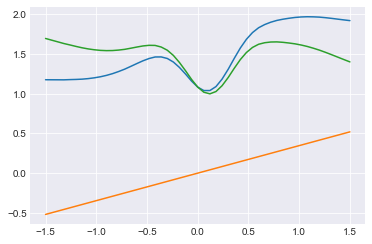

In [58]:
plt.plot(bias,spec_loweravg_2T)
plt.plot(bias, bias*slope)
plt.plot(bias,spec_loweravg_2T-bias*slope)
"""Sub_2T = spec_loweravg_2T-(bias+1.5)*slope
Norm_2T = Sub_2T/Sub_2T[0]
plt.plot(bias,Norm_2T)"""

In [208]:
right = spec_loweravg_3T[:9].mean()
left = spec_loweravg_3T[42:51].mean()
slope = (right-left)/3.0

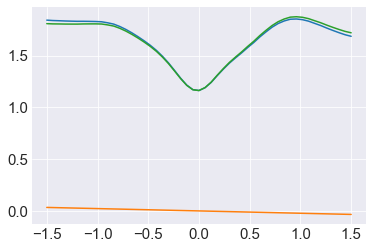

In [209]:
plt.plot(bias,spec_loweravg_3T)
plt.plot(bias, bias*slope)
plt.plot(bias,spec_loweravg_3T-bias*slope)

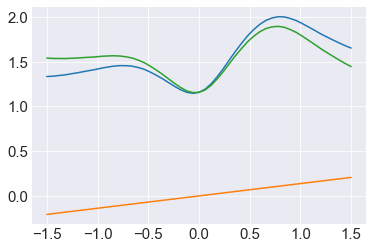

In [211]:
right = lockin_4T_loweravg[:9].mean()
left = lockin_4T_loweravg[42:51].mean()
slope = (right-left)/3.0

plt.plot(bias,lockin_4T_loweravg)
plt.plot(bias, bias*slope)
plt.plot(bias,lockin_4T_loweravg-bias*slope)

In [234]:
import scipy
from scipy.optimize import curve_fit
import math

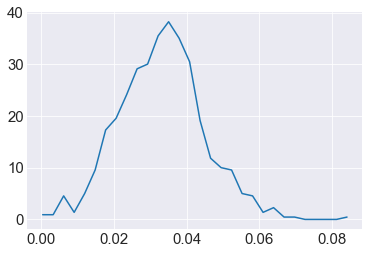

In [235]:
zero_hist, zero_bins = scipy.histogram(ZBC_cut_norm_list[0],bins = 30)

plt.plot(zero_bins[:-1],zero_hist)

plt.show()

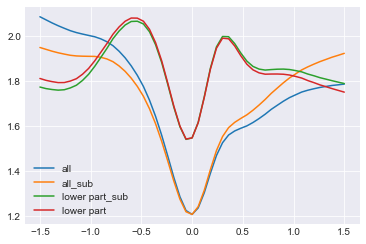

In [29]:
plt.figure()
rbound = 15
lbound = 51- rbound

right = lockin_avg_list[6][:rbound].sum()
left = lockin_avg_list[6][lbound:51].mean()
slope = (right-left)/3.0
plt.plot(bias,lockin_avg_list[6],label = 'all')
plt.plot(bias,lockin_avg_list[6]-bias*slope,label = 'all_sub')

right = lockin_4T_loweravg[:rbound].mean()
left = lockin_4T_loweravg[lbound:51].mean()
slope = (right-left)/3.0
plt.plot(bias,lockin_4T_loweravg-bias*slope,label = 'lower part_sub')
plt.plot(bias,lockin_4T_loweravg,label = 'lower part')
plt.legend();